In [26]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from CNN2Dbis import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time

import pdb

torch.manual_seed(1)

In [24]:
def testset(numbr):
    a=0
    data_test = {}
    for i in os.listdir('./final_dataset/test/%s'%numbr):
        if i.endswith('.txt'):
            a = a+1
            data_test['%s'%a] = pd.read_csv('final_dataset/test/{}/{}'.format(numbr,i), header = None, 
                                        names = ['frameNb','id', 'x','y','Vx','Vy'],
                                            delimiter=' ')
    return data_test

In [5]:
import os
data_train = {}
data_val = {}
a=0
for j in range(1,4):
    for i in os.listdir('./final_dataset/train/%s'%j):
        if i.endswith('.txt'):
            a = a+1
            data_train['%s'%a] = pd.read_csv('final_dataset/train/{}/{}'.format(j,i), header = None, 
                                        names = ['frameNb','id', 'x','y','Vx','Vy'],
                                           delimiter=' ')
a=0
for j in range(1,4):
    for i in os.listdir('./final_dataset/validation/%s'%j):
        if i.endswith('.txt'):
            a = a+1
            data_val['%s'%a] = pd.read_csv('final_dataset/validation/{}/{}'.format(j,i), header = None, 
                                        names = ['frameNb','id', 'x','y','Vx','Vy'],
                                           delimiter=' ')

data_test_1 = testset(1)
data_test_2 = testset(2)
data_test_3 = testset(3)

In [7]:
inputs_train = np.zeros([len(data_train),10,2])
gt_train = np.zeros([len(data_train),10,2])
in_coord_train = np.zeros([len(data_train),10,2])
gt_coord_train = np.zeros([len(data_train),11,2])

inputs_val = np.zeros([len(data_val),10,2])
gt_val = np.zeros([len(data_val),10,2])
in_coord_val = np.zeros([len(data_val),10,2])
gt_coord_val = np.zeros([len(data_val),11,2])

inputs_test_1 = np.zeros([len(data_test_1),10,2])
gt_test_1 = np.zeros([len(data_test_1),10,2])
in_coord_test_1 = np.zeros([len(data_test_1),10,2])
gt_coord_test_1 = np.zeros([len(data_test_1),11,2])

inputs_test_2 = np.zeros([len(data_test_2),10,2])
gt_test_2 = np.zeros([len(data_test_2),10,2])
in_coord_test_2 = np.zeros([len(data_test_2),10,2])
gt_coord_test_2 = np.zeros([len(data_test_2),11,2])

inputs_test_3 = np.zeros([len(data_test_3),10,2])
gt_test_3 = np.zeros([len(data_test_3),10,2])
in_coord_test_3 = np.zeros([len(data_test_3),10,2])
gt_coord_test_3 = np.zeros([len(data_test_3),11,2])

a = 0
for i in data_train:
    inputs_train[a,:,:] = np.array(data_train['%s'%i].loc[0:9,['Vx','Vy']])
    gt_train[a,:,:] = np.array(data_train['%s'%i].loc[10:19,['Vx','Vy']])
    in_coord_train[a,:,:] = np.array(data_train['%s'%i].loc[0:9,['x','y']])
    gt_coord_train[a,:,:] = np.array(data_train['%s'%i].loc[9:19,['x','y']])
    a +=1
    
a = 0
for i in data_val:
    inputs_val[a,:,:] = np.array(data_val['%s'%i].loc[0:9,['Vx','Vy']])
    gt_val[a,:,:] = np.array(data_val['%s'%i].loc[10:19,['Vx','Vy']])
    in_coord_val[a,:,:] = np.array(data_val['%s'%i].loc[0:9,['x','y']])
    gt_coord_val[a,:,:] = np.array(data_val['%s'%i].loc[9:19,['x','y']])
    a +=1
    
a = 0
for i in data_test_1:
    inputs_test_1[a,:,:] = np.array(data_test_1['%s'%i].loc[0:9,['Vx','Vy']])
    gt_test_1[a,:,:] = np.array(data_test_1['%s'%i].loc[10:19,['Vx','Vy']])
    in_coord_test_1[a,:,:] = np.array(data_test_1['%s'%i].loc[0:9,['x','y']])
    gt_coord_test_1[a,:,:] = np.array(data_test_1['%s'%i].loc[9:19,['x','y']])
    a +=1
    
a = 0
for i in data_test_2:
    inputs_test_2[a,:,:] = np.array(data_test_2['%s'%i].loc[0:9,['Vx','Vy']])
    gt_test_2[a,:,:] = np.array(data_test_2['%s'%i].loc[10:19,['Vx','Vy']])
    in_coord_test_2[a,:,:] = np.array(data_test_2['%s'%i].loc[0:9,['x','y']])
    gt_coord_test_2[a,:,:] = np.array(data_test_2['%s'%i].loc[9:19,['x','y']])
    a +=1
    
a = 0
for i in data_test_3:
    inputs_test_3[a,:,:] = np.array(data_test_3['%s'%i].loc[0:9,['Vx','Vy']])
    gt_test_3[a,:,:] = np.array(data_test_3['%s'%i].loc[10:19,['Vx','Vy']])
    in_coord_test_3[a,:,:] = np.array(data_test_3['%s'%i].loc[0:9,['x','y']])
    gt_coord_test_3[a,:,:] = np.array(data_test_3['%s'%i].loc[9:19,['x','y']])
    a +=1

In [19]:
inputs_test_3.shape

(460, 10, 2)

In [9]:
x_train,y_train = torch.from_numpy(inputs_train).type(torch.FloatTensor), torch.from_numpy(gt_train).type(torch.FloatTensor)
x_val,y_val = torch.from_numpy(inputs_val).type(torch.FloatTensor), torch.from_numpy(gt_val).type(torch.FloatTensor)
x_test_1,y_test_1 = torch.from_numpy(inputs_test_1).type(torch.FloatTensor), torch.from_numpy(gt_test_1).type(torch.FloatTensor)
x_test_2,y_test_2 = torch.from_numpy(inputs_test_2).type(torch.FloatTensor), torch.from_numpy(gt_test_2).type(torch.FloatTensor)
x_test_3,y_test_3 = torch.from_numpy(inputs_test_3).type(torch.FloatTensor), torch.from_numpy(gt_test_3).type(torch.FloatTensor)

x_train = x_train.unsqueeze(1) 
y_train = y_train.unsqueeze(1) 
x_val = x_val.unsqueeze(1) 
y_val = y_val.unsqueeze(1) 
x_test_1 = x_test_1.unsqueeze(1) 
y_test_1 = y_test_1.unsqueeze(1) 
x_test_2 = x_test_2.unsqueeze(1) 
y_test_2 = y_test_2.unsqueeze(1) 
x_test_3 = x_test_3.unsqueeze(1) 
y_test_3 = y_test_3.unsqueeze(1) 

print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test1 data shape: ', x_test_1.shape)
print('Test1 labels shape: ', y_test_1.shape)
print('Test2 data shape: ', x_test_2.shape)
print('Test2 labels shape: ', y_test_2.shape)
print('Test3 data shape: ', x_test_3.shape)
print('Test3 labels shape: ', y_test_3.shape)

traindataset = utils.TensorDataset(x_train, y_train)
trainloader = utils.DataLoader(traindataset, batch_size=32, shuffle=True)

valdataset = utils.TensorDataset(x_val, y_val)
valloader = utils.DataLoader(valdataset, batch_size=32, shuffle=True)

Train data shape:  torch.Size([5157, 1, 10, 2])
Train labels shape:  torch.Size([5157, 1, 10, 2])
Validation data shape:  torch.Size([1719, 1, 10, 2])
Validation labels shape:  torch.Size([1719, 1, 10, 2])
Test1 data shape:  torch.Size([251, 1, 10, 2])
Test1 labels shape:  torch.Size([251, 1, 10, 2])
Test2 data shape:  torch.Size([1007, 1, 10, 2])
Test2 labels shape:  torch.Size([1007, 1, 10, 2])
Test3 data shape:  torch.Size([460, 1, 10, 2])
Test3 labels shape:  torch.Size([460, 1, 10, 2])


In [31]:
net = CNN2Dbis()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay=1e-4)
epochs = 100
steps = 0
running_loss = 0
print_every = 323
vec_acc_ = np.zeros(epochs*25)
for e in range(epochs):
    start = time.time()
    for images, labels in iter(trainloader):
        
        steps += 1
        inp = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        output = net.forward(inp)
        loss = criterion(output, targets.view(-1,20))
        grad = loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            stop = time.time()
            # Test accuracy
            accuracy = 0
            sum_accuracy = 0
            
            for ii, (images, labels) in enumerate(valloader):
                
                inp = Variable(images)
                targets = Variable(labels)
                predicted = net.predict(inp)
                accuracy = criterion(predicted, targets.view(-1,20))
                accuracy = accuracy.data.numpy()
                #vec_acc_[steps-1] = accuracy/(ii+1)
                sum_accuracy += accuracy
                
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(loss.data[0]),
                  "Test precision: {:.4f}..".format(sum_accuracy/(ii+1)),
                  "{:.4f} s/batch ".format((stop - start)/print_every),
                  "steps {:.4f}".format(steps)
                 )
            running_loss = 0
            start = time.time()

#plt.plot(range(epochs*25),vec_acc_)
#plt.show()

/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2/100.. Loss: 0.2085.. Test precision: 0.1777.. 0.0006 s/batch  steps 323.0000
Epoch: 4/100.. Loss: 0.1045.. Test precision: 0.1188.. 0.0006 s/batch  steps 646.0000
Epoch: 6/100.. Loss: 0.1117.. Test precision: 0.1017.. 0.0006 s/batch  steps 969.0000
Epoch: 8/100.. Loss: 0.0988.. Test precision: 0.0927.. 0.0006 s/batch  steps 1292.0000
Epoch: 10/100.. Loss: 0.0716.. Test precision: 0.0864.. 0.0006 s/batch  steps 1615.0000
Epoch: 12/100.. Loss: 0.0979.. Test precision: 0.0816.. 0.0006 s/batch  steps 1938.0000
Epoch: 14/100.. Loss: 0.1047.. Test precision: 0.0779.. 0.0006 s/batch  steps 2261.0000
Epoch: 16/100.. Loss: 0.0702.. Test precision: 0.0768.. 0.0006 s/batch  steps 2584.0000
Epoch: 18/100.. Loss: 0.0989.. Test precision: 0.0753.. 0.0006 s/batch  steps 2907.0000
Epoch: 20/100.. Loss: 0.0507.. Test precision: 0.0739.. 0.0006 s/batch  steps 3230.0000
Epoch: 22/100.. Loss: 0.1243.. Test precision: 0.0730.. 0.0006 s/batch  steps 3553.0000
Epoch: 24/100.. Loss: 0.0749.. Test pre

In [37]:
output_test_1 = net.predict(x_test_1)
output_test_1 = output_test_1.data.numpy()
output_test_1 = np.reshape(output_test_1,(251,10,2))

output_test_2 = net.predict(x_test_2)
output_test_2 = output_test_2.data.numpy()
output_test_2 = np.reshape(output_test_2,(1007,10,2))

output_test_3 = net.predict(x_test_3)
output_test_3 = output_test_3.data.numpy()
output_test_3 = np.reshape(output_test_3,(460,10,2))

(460, 20)


In [36]:
output_coord=np.zeros([len(output_final),11,2])
for j in range(11):
    for i in range(len(output_final)):
        if j==0:
            output_coord[i,j,:] = in_coord_test[i,9,:]
        else:
            output_coord[i,j,:] = output_coord[i,j-1,:]+output_final[i,j-1,:]*0.4
print(output_coord.shape)

NameError: name 'output_final' is not defined

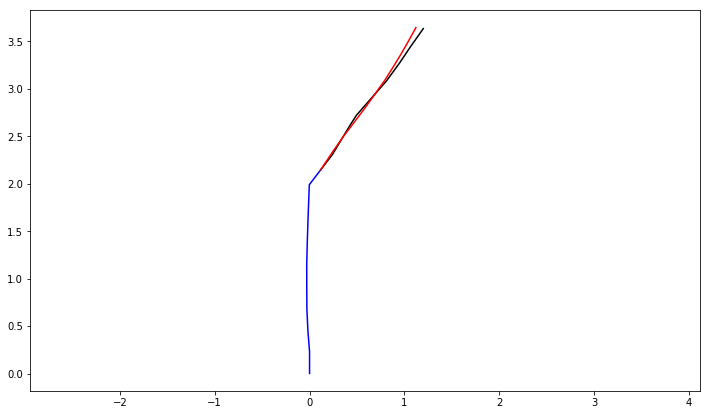

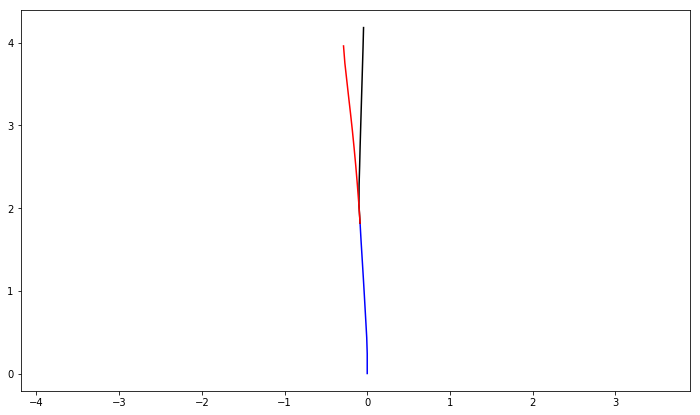

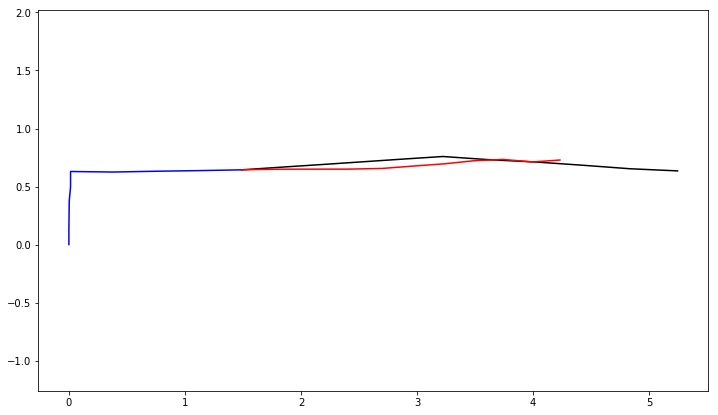

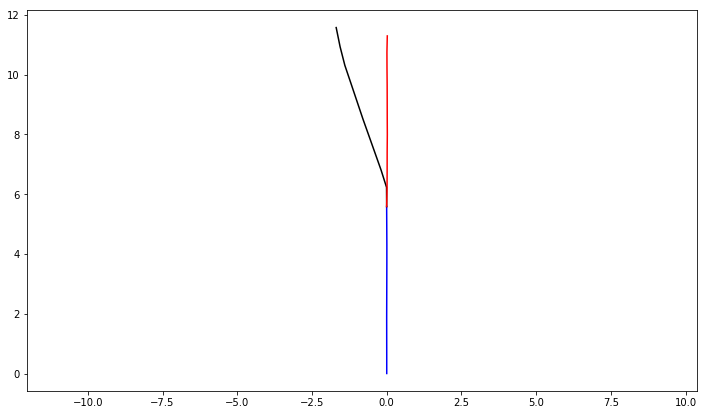

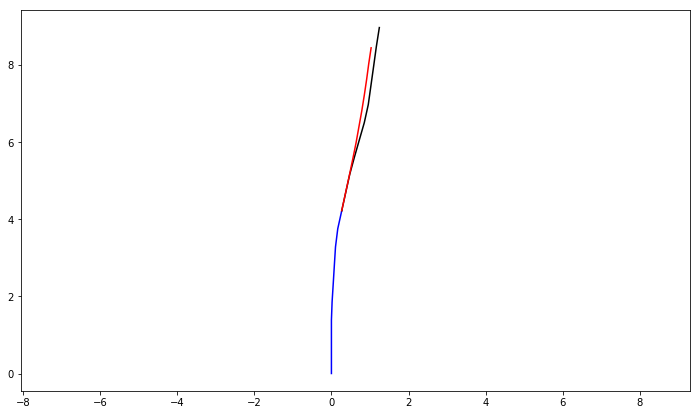

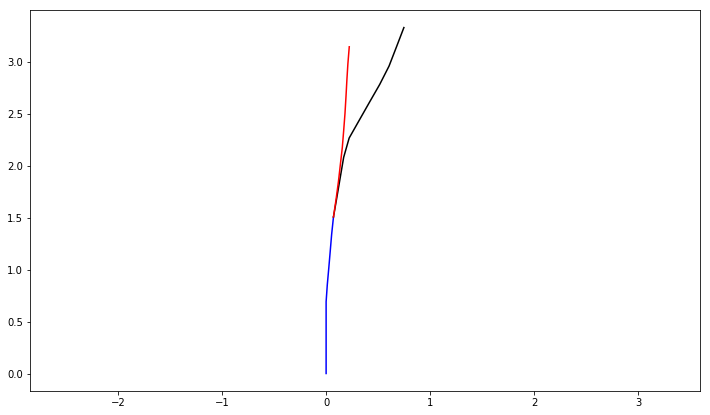

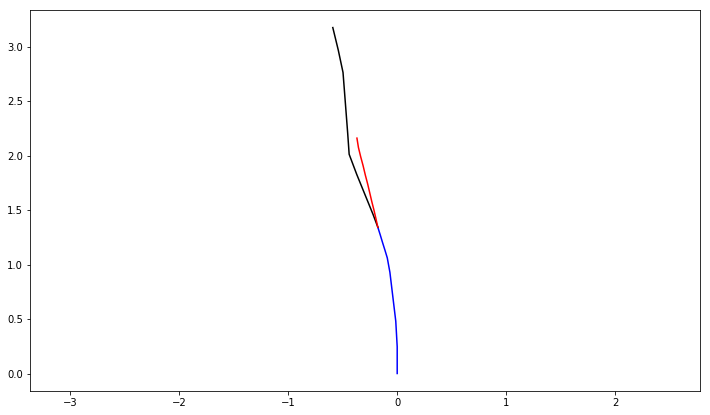

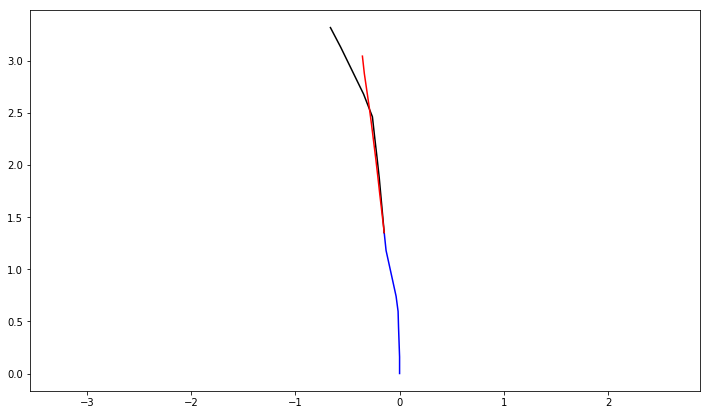

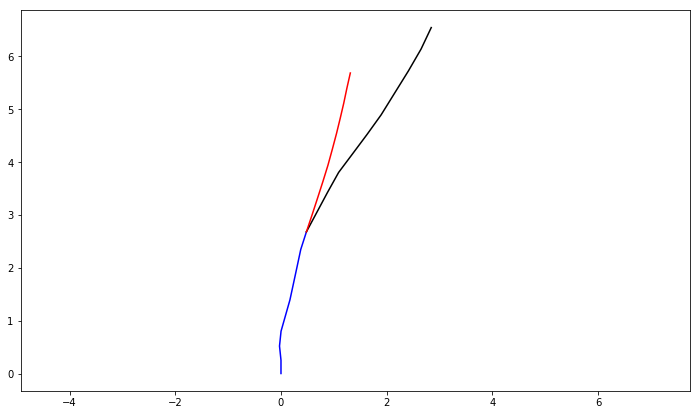

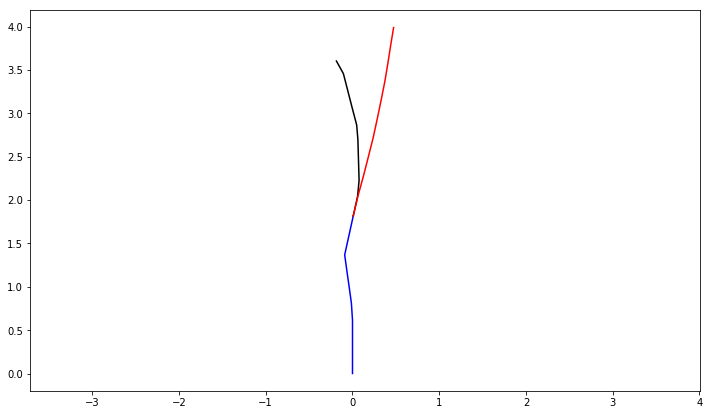

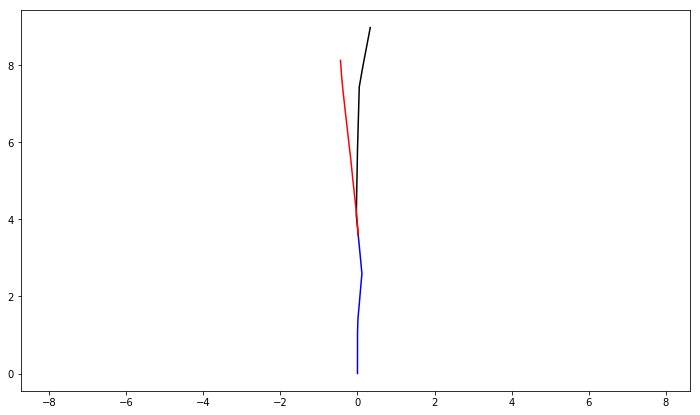

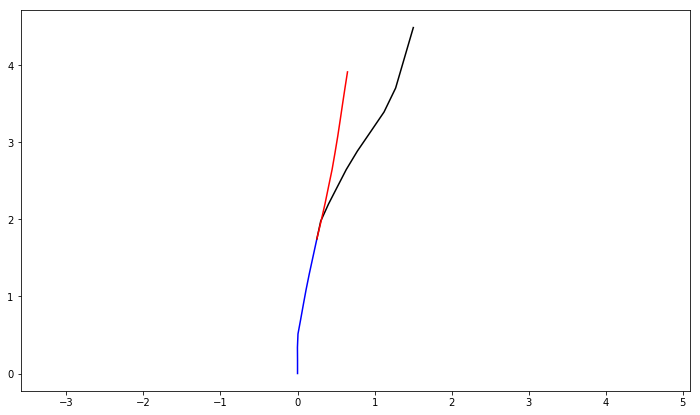

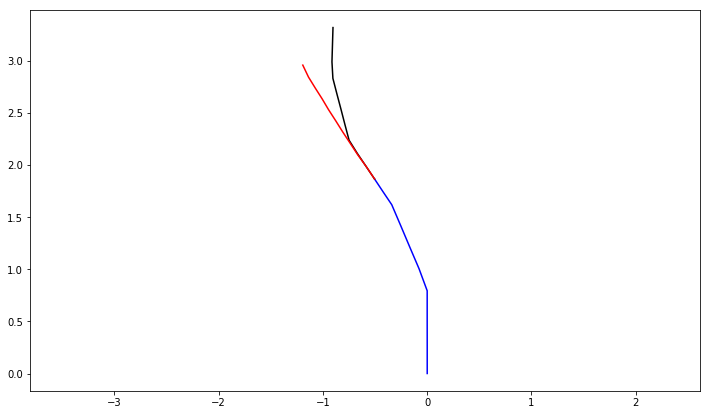

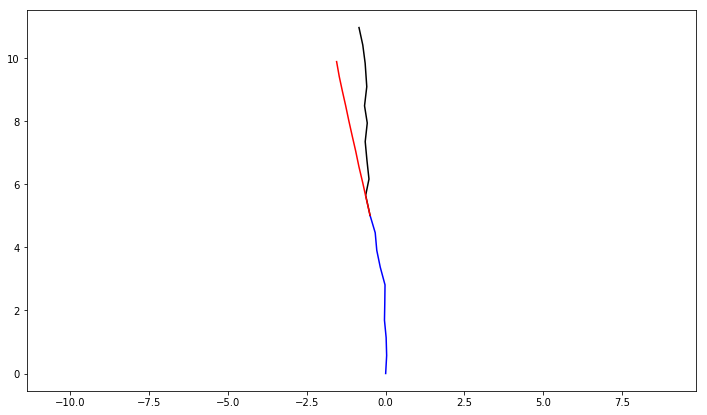

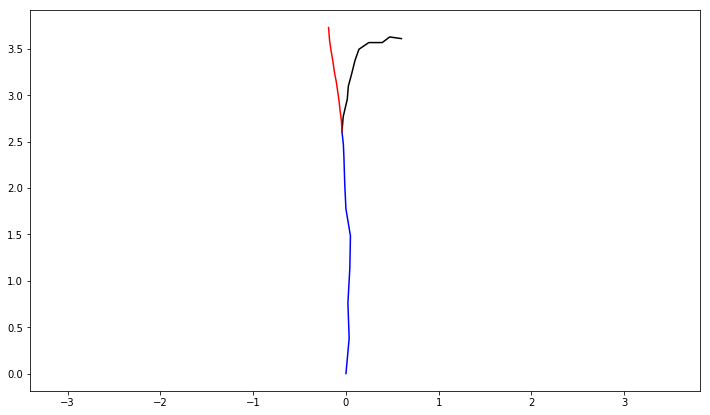

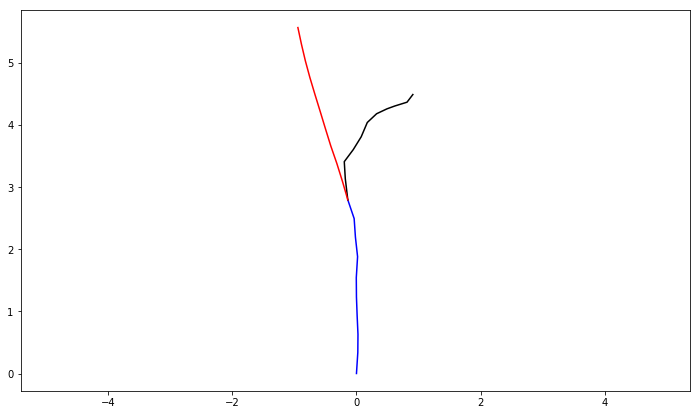

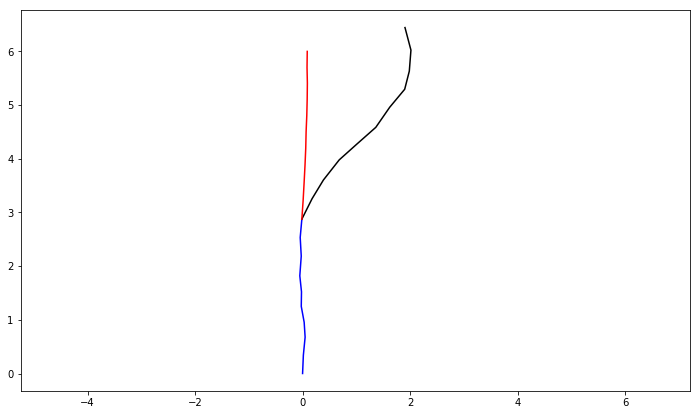

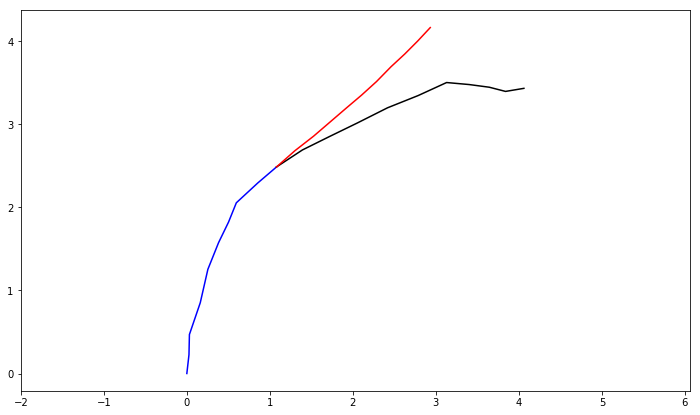

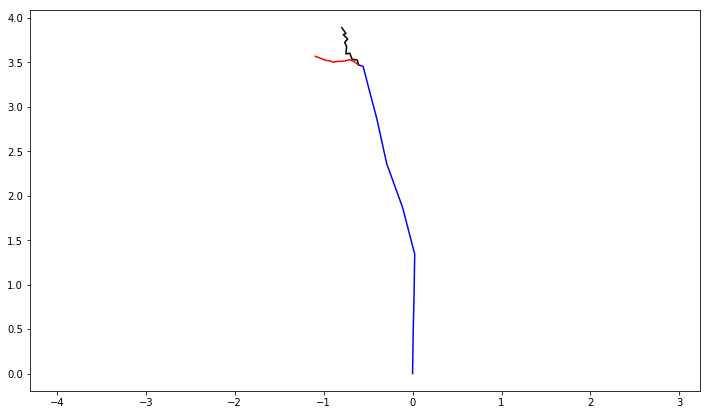

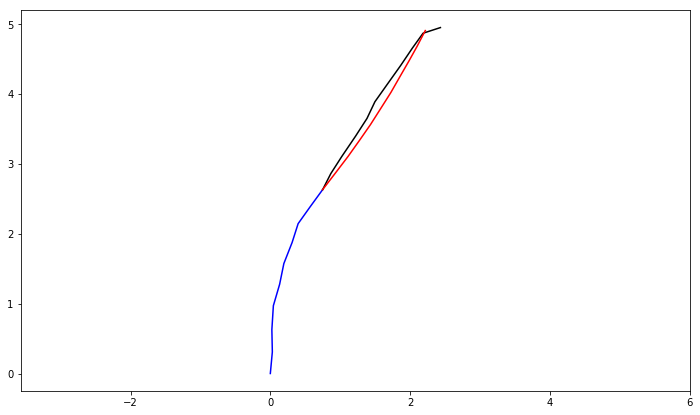

In [17]:
for i in range(20):
    plt.figure(figsize=(12, 7))

    plt.plot(in_coord_test[(i*20)+1000,:,0],in_coord_test[(i*20)+1000,:,1],c='b')
    plt.plot(gt_coord_test[(i*20)+1000,:,0],gt_coord_test[(i*20)+1000,:,1],c='k')
    plt.plot(output_coord[(i*20)+1000,:,0],output_coord[(i*20)+1000,:,1],c='r')
    plt.axis('equal')
    plt.show()

In [14]:
dist = np.zeros(len(gt_coord_test))
for i in range(len(gt_coord_test)):
    dist[i] = np.sqrt((gt_coord_test[i][10][0]-output_coord[i][10][0])**2+(gt_coord_test[i][10][1]-output_coord[i][10][1])**2)

final_coord_error = np.mean(dist)
print('The final distance between the ground trought and the predicted coordinates is :',final_coord_error.round(3))

The final distance between the ground trought and the predicted coordinates is : 0.979


In [15]:
avr = np.zeros((len(gt_coord_test),10))
for i in range(len(gt_coord_test)):
    for j in range(10):
        avr[i,j] = np.sqrt((gt_coord_test[i][j][0]-output_coord[i][j][0])**2+(gt_coord_test[i][j][1]-output_coord[i][j][1])**2)

average = np.mean(np.mean(avr,1))
print('The average error between the ground trought and the predicted coordinates is :',average.round(3))

The average error between the ground trought and the predicted coordinates is : 0.366
